<table>
  <tr>
    <td style="text-align: left;">
      <h1>Lighthouse Labs</h1>
      <h2>W4D5 - Examples Notebook: Intro to EDA</h2>
      <strong>Instructor:</strong> Socorro E. Dominguez-Vidana
    </td>
    <td style="text-align: right;">
      <img src="img/lhl.jpeg" alt="LHL" width="200">
    </td>
  </tr>
</table>

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/sedv8808/LHL_Lectures/main?labpath=W4D5%2FW4D5_Examples.ipynb)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('data/df_filled.csv', parse_dates = ['date'])
df.head(2)

,tavg,co,no,no2,o3,pm10,pm25,so2,date,latitude,longitude
0,18.9,0.21,9.220395,12.0,70.0,13.0,5.8,0.95,2022-08-30,52.358039,4.899700
1,18.9,0.20,1.580324,14.0,79.0,12.0,7.2,0.95,2022-08-30,52.359714,4.866208


## Matplotlib

For a a simple plot, or when you want very fine-grained control over every aspect of the plot.

### Example 1

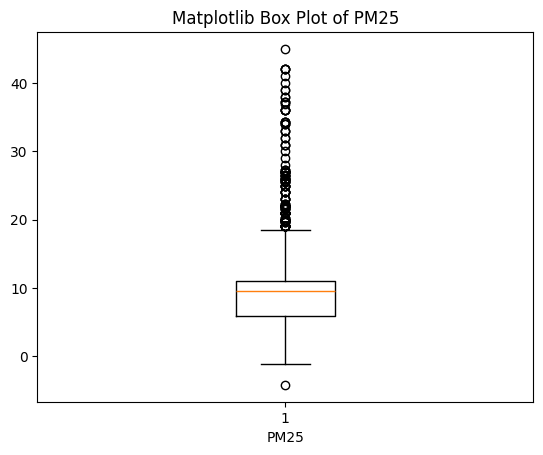

In [3]:
plt.boxplot(df['pm25'], widths=0.2, whis=1.5)
plt.title('Matplotlib Box Plot of PM25')
plt.xlabel('PM25')
plt.show()

For a  single plot the syntax is:  
`plt` (the library) + `.` + `method`
`plt` + `.` + **figure**(`data[column]`)  
[Documentation Example](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

### Example 2
When using matplotlib, the general workflow is consists of:
1. Using `plt.subplots()` to create a **Figure** and any number of **Axes** (graphs) you want.
    - You can think of a Figure as the canvas for your plot and Axes as the graphs on the canvas.
2. Using the `ax.` plotting methods to generate the visualizations.
3. Using the `ax.` customization methods to fine-tune your plots.
4. Displaying or saving the plot.

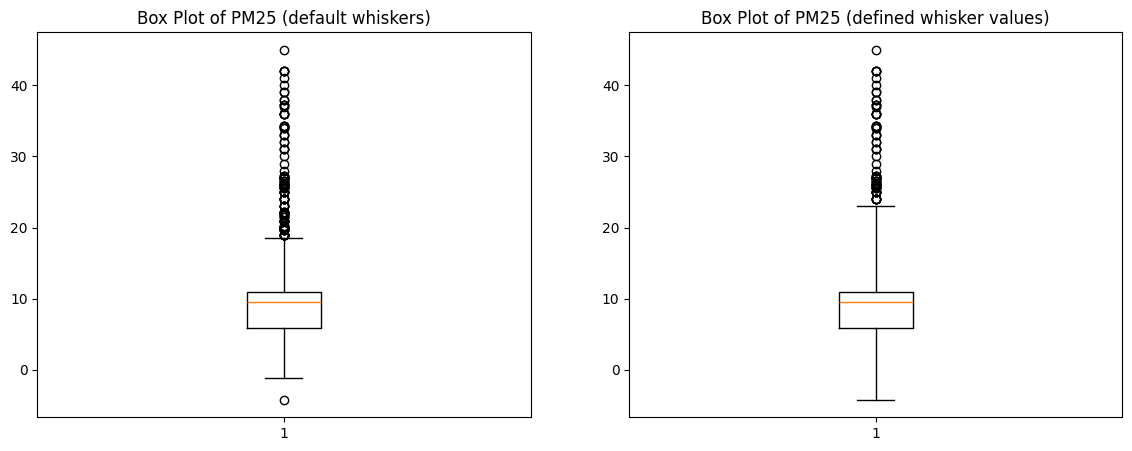

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].boxplot(df['pm25'])
axes[0].set_title('Box Plot of PM25 (default whiskers)')

axes[1].boxplot(df['pm25'], whis=2.5)
axes[1].set_title('Box Plot of PM25 (defined whisker values)')

plt.show()

### Example 3

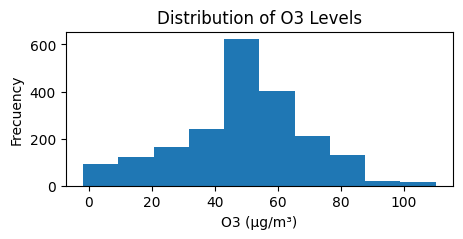

In [5]:
# Create Figure and Axes objects with which to do your plotting
fig, ax = plt.subplots(figsize=(5, 2))

# Plot the data using one of Matplotlib's plotting functions
ax.hist(df['o3'])

# Customize other aspects of the plot
ax.set_title('Distribution of O3 Levels')
ax.set_xlabel('O3 (µg/m³)')
ax.set_ylabel('Frecuency')

# Display the plot
plt.show()

### Example 4

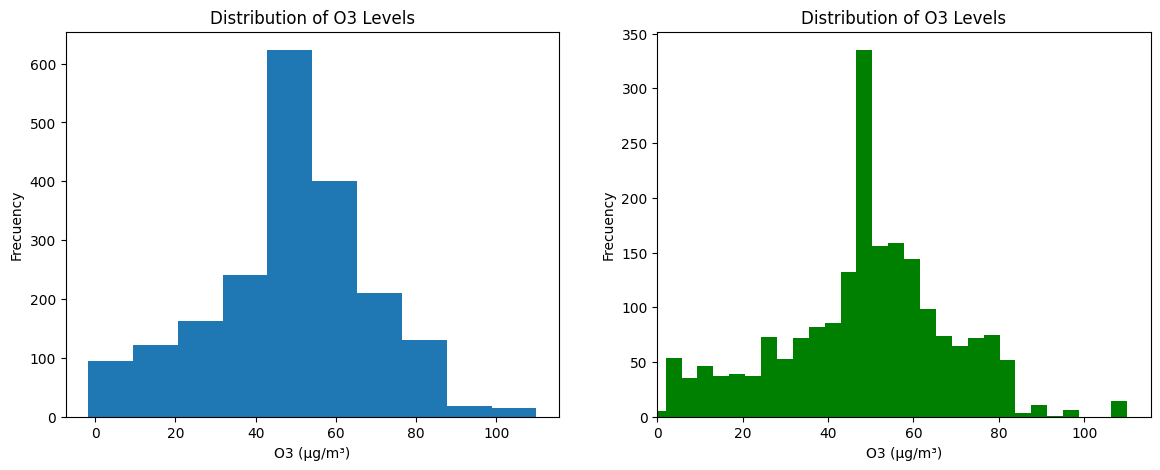

In [6]:
# Create 2 graphs, arranged in a 1row X 2column. 
# "axes" will be an array of Axes objects.
# Note: if our grid were 2D (i.e. more than 1 row and column), 
# then "axes" would be a 2D array of Axes objects.
fig, axes = plt.subplots(
    nrows=1, 
    ncols=2, 
    figsize=(14, 5)
)

# Plot 0
axes[0].hist(df['o3'])
axes[0].set_title('Distribution of O3 Levels')
axes[0].set_xlabel('O3 (µg/m³)')
axes[0].set_ylabel('Frecuency')

# Plot 1
axes[1].hist(df['o3'], bins=30, color='green')
axes[1].set_title('Distribution of O3 Levels')
axes[1].set_xlabel('O3 (µg/m³)')
axes[1].set_ylabel('Frecuency')
axes[1].set_xlim(left=0)

plt.show()

### Example 5

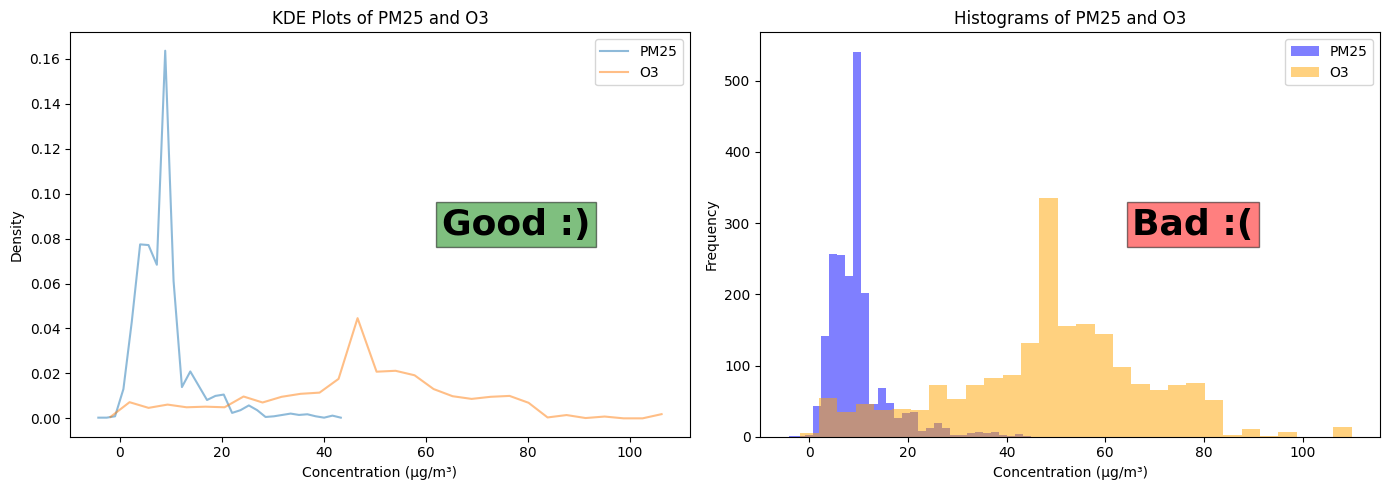

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

x_pm25 = np.linspace(df['pm25'].min(), df['pm25'].max(), 100)
x_o3 = np.linspace(df['o3'].min(), df['o3'].max(), 100)

density_pm25 = np.histogram(df['pm25'], bins=30, density=True)
ax[0].plot(density_pm25[1][:-1], density_pm25[0], label='PM25', alpha=0.5)

density_o3 = np.histogram(df['o3'], bins=30, density=True)
ax[0].plot(density_o3[1][:-1], density_o3[0], label='O3', alpha=0.5)

ax[0].set_title('KDE Plots of PM25 and O3')
ax[0].set_xlabel('Concentration (µg/m³)')
ax[0].set_ylabel('Density')
ax[0].legend()
ax[0].text(
    x=0.6,
    y=0.5,
    s='Good :)',
    fontsize=26,
    fontweight='bold',
    transform=ax[0].transAxes,
    bbox=dict(facecolor='green', alpha=0.5)
)

ax[1].hist(df['pm25'], bins=30, alpha=0.5, label='PM25', color='blue')
ax[1].hist(df['o3'], bins=30, alpha=0.5, label='O3', color='orange')
ax[1].set_title('Histograms of PM25 and O3')
ax[1].set_xlabel('Concentration (µg/m³)')
ax[1].set_ylabel('Frequency')
ax[1].legend()
ax[1].text(
    x=0.6,
    y=0.5,
    s='Bad :(',
    fontsize=26,
    fontweight='bold',
    transform=ax[1].transAxes,
    bbox=dict(facecolor='red', alpha=0.5)
)

plt.tight_layout()
plt.show()

## Seaborn

We can also use the `seaborn` library to create these same plots (and more). Most Seaborn plotting functions take in:
- A `data` argument, which is your Pandas dataframe
- One or more column names from your dataframe which dictate which parts are used for plotting

[Seaborn Gallery](https://seaborn.pydata.org/examples/index.html) <br>
[Seaborn Tutorial](https://matplotlib.org/stable/tutorials/index.html) <br>
[Seaborn Set Theme Documentation](https://seaborn.pydata.org/generated/seaborn.set_theme.html)

Check out Seaborn's example plotting gallery [here](https://seaborn.pydata.org/examples/index.html) for inspiration on the different types of graphs possible with Seaborn.

### Example 1

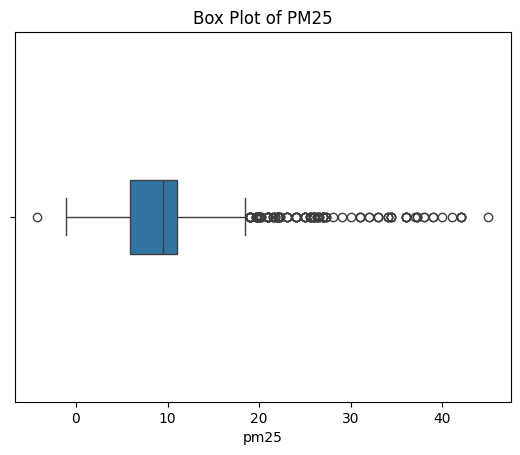

In [8]:
sns.boxplot(data=df, x='pm25', whis=1.5, width=0.2)
plt.title('Box Plot of PM25')
plt.show()

### Example 2

Seaborn plots can be customized further using matplotlib. Any seaborn plotting function:
- Returns a matplotlib "Axes" object, which you can use just like any ordinary Matplotlib object.
- Can optionally take a Matplotlib "Axes" object as input, if you want to apply a Seaborn plot to an existing figure.

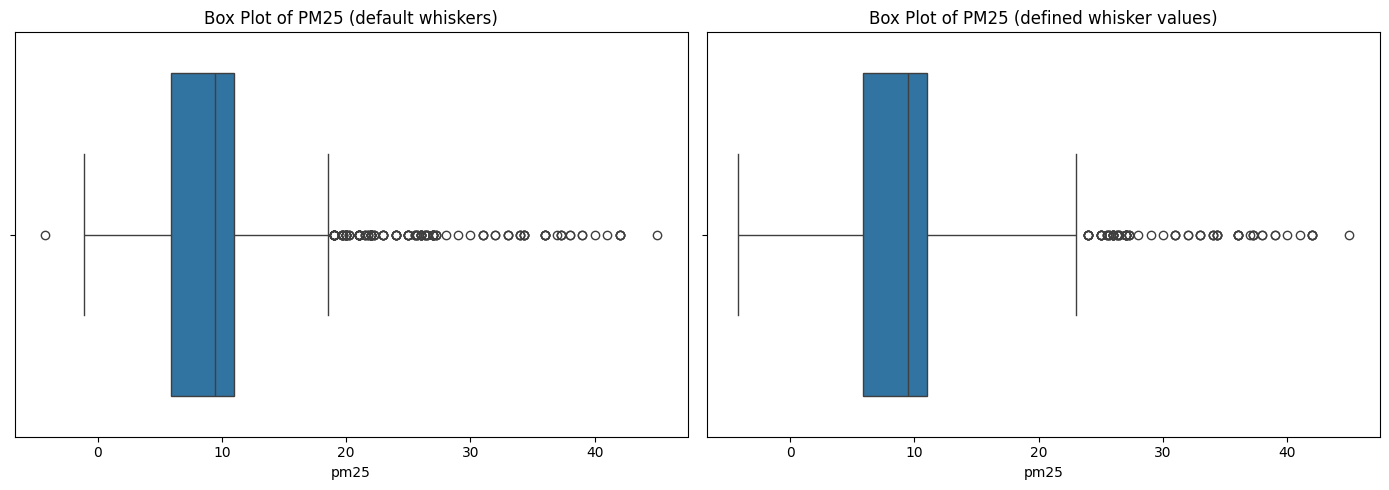

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Default whiskers box plot
sns.boxplot(data=df, x='pm25', ax=axes[0], whis=1.5)
axes[0].set_title('Box Plot of PM25 (default whiskers)')

# Box plot with custom whiskers
sns.boxplot(data=df, x='pm25', ax=axes[1], whis=2.5)
axes[1].set_title('Box Plot of PM25 (defined whisker values)')

plt.tight_layout()
plt.show()

### Example 3

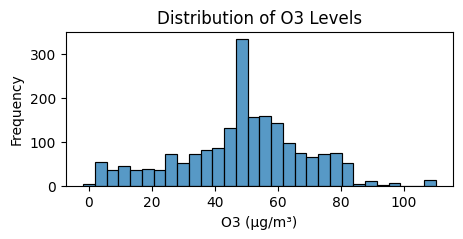

In [10]:
fig, ax = plt.subplots(figsize=(5, 2))

sns.histplot(df['o3'], bins=30, ax=ax)

ax.set_title('Distribution of O3 Levels')
ax.set_xlabel('O3 (µg/m³)')
ax.set_ylabel('Frequency')
plt.show()

#### Example 4

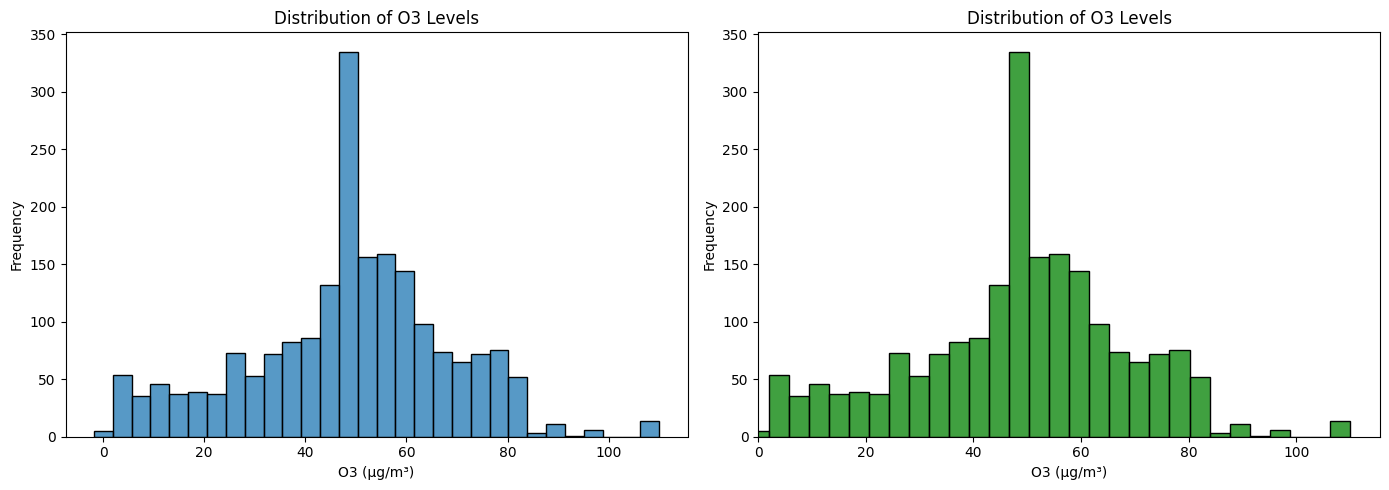

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

sns.histplot(df['o3'], bins=30, ax=axes[0])
axes[0].set_title('Distribution of O3 Levels')
axes[0].set_xlabel('O3 (µg/m³)')
axes[0].set_ylabel('Frequency')

sns.histplot(df['o3'], bins=30, color='green', ax=axes[1])
axes[1].set_title('Distribution of O3 Levels')
axes[1].set_xlabel('O3 (µg/m³)')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(left=0)

plt.tight_layout()
plt.show()

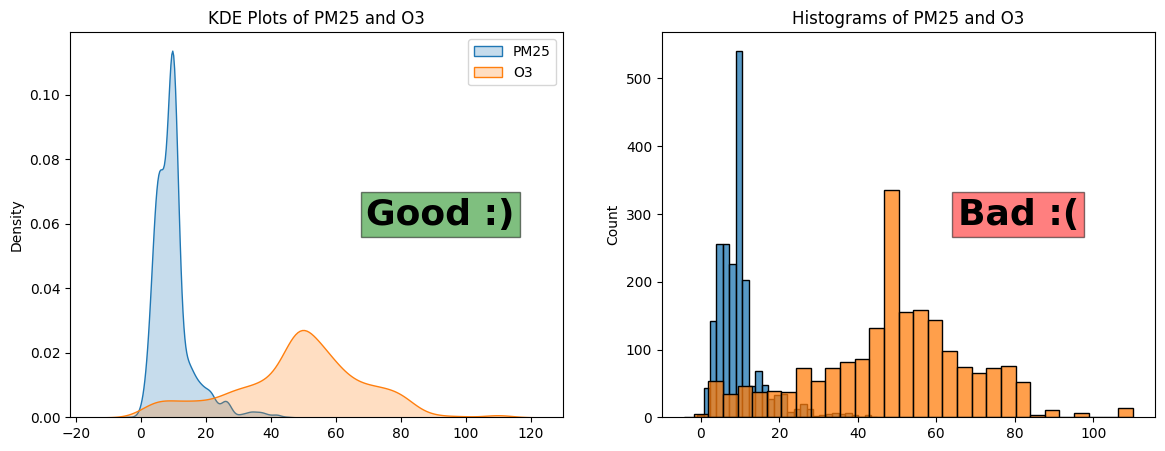

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.kdeplot(data=df, x='pm25', fill=True, label='PM25', ax=ax[0])
sns.kdeplot(data=df, x='o3', fill=True, label='O3', ax=ax[0])
ax[0].set_title('KDE Plots of PM25 and O3')
ax[0].legend()
ax[0].set_xlabel(None)
ax[0].text(
    x=0.6,
    y=0.5,
    s='Good :)',
    fontsize=26,
    fontweight='bold',
    transform=ax[0].transAxes,
    bbox=dict(facecolor='green', alpha=0.5)
)

sns.histplot(data=df, x='pm25', bins=30, ax=ax[1])
sns.histplot(data=df, x='o3', bins=30, ax=ax[1])
ax[1].set_title('Histograms of PM25 and O3')
ax[1].set_xlabel(None)
ax[1].text(
    x=0.6,
    y=0.5,
    s='Bad :(',
    fontsize=26,
    fontweight='bold',
    transform=ax[1].transAxes,
    bbox=dict(facecolor='red', alpha=0.5)
)

plt.show()

## Plotly

Plotly's main feature over matplotlib and seaborn is its hover tool capability. Plotly can be installed:
- using pip: `pip install plotly`
- or conda: `conda install -c plotly plotly`.

### JupyterLab:
For use in JupyterLab, also install the jupyterlab and ipywidgets packages:
- using pip: `pip install "jupyterlab>=3" "ipywidgets>=7.6"`
- or conda: `conda install "jupyterlab>=3" "ipywidgets>=7.6"`

You'll need jupyter-dash to add widgets such as sliders, dropdowns, and buttons to Plotly charts in JupyterLab.
- using pip: `pip install jupyter-dash`
- or conda: `conda install -c conda-forge -c plotly jupyter-dash`

### Jupyter Notebook:

For use in Jupyter Notebook, install the notebook and ipywidgets packages:
- using pip: `pip install "notebook>=5.3" "ipywidgets>=7.5"`
- or conda: `conda install "notebook>=5.3" "ipywidgets>=7.5"`

In [13]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'iframe'

In [14]:
fig = px.box(df, y='pm25', title='Box Plot of PM25', width=600)
fig.show()

### Example 2

In [15]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=('Box Plot of PM25 (default whiskers)', 
                                    'Box Plot of PM25 (defined whisker values)'))
fig.add_trace(
    go.Box(y=df['pm25'], 
           name='PM25 (default whiskers)', 
           boxpoints=False, 
           whiskerwidth=.75),
    row=1, col=1
)

fig.add_trace(
    go.Box(y=df['pm25'], 
           name='PM25 (defined whisker values)', 
           boxpoints=False, 
           whiskerwidth=1),
    row=1, col=2
)

fig.update_layout(height=500, width=800, title_text="Box Plot Comparisons")
fig.show()

### Example 3

In [16]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=df['o3'], nbinsx=30))

fig.update_layout(
    title='Distribution of O3 Levels',
    xaxis_title='O3 (µg/m³)',
    yaxis_title='Frequency',
    width=500, height=300
)
fig.show()

### Example 4

In [17]:
fig = make_subplots(rows=1, 
                    cols=2, 
                    subplot_titles=['Distribution of O3 Levels', 
                                    'Distribution of O3 Levels (Green)'])

fig.add_trace(
    go.Histogram(x=df['o3'], nbinsx=30),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=df['o3'], nbinsx=30, marker_color='green'),
    row=1, col=2
)

# Customize layout
fig.update_layout(
    title_text='O3 Levels Distribution Across Different Bins',
    width=800,
    height=400
)

fig.update_xaxes(range=[0, None], row=1, col=2)

fig.show()

### Example 5

In [18]:
import plotly.express as px
import plotly.graph_objects as go

fig_kde = go.Figure()

fig_kde.add_trace(go.Histogram(
    x=df['pm25'],
    histnorm='probability density',
    name='PM25',
    opacity=0.5,
    marker=dict(color='blue'),
    showlegend=True
))

fig_kde.add_trace(go.Histogram(
    x=df['o3'],
    histnorm='probability density',
    name='O3',
    opacity=0.5,
    marker=dict(color='orange'),
    showlegend=True
))

fig_kde.update_layout(
    title='KDE Plots of PM25 and O3',
    xaxis_title='Concentration (µg/m³)',
    yaxis_title='Density',
    barmode='overlay'
)

fig_kde.show()

In [19]:


fig_hist = px.histogram(
    df,
    x='pm25',
    nbins=30,
    title='Histograms of PM25 and O3',
    opacity=0.5,
    color_discrete_sequence=['blue']
)


fig_hist.add_trace(px.histogram(
    df,
    x='o3',
    nbins=30,
    opacity=0.5,
    color_discrete_sequence=['orange']
).data[0])

fig_hist.update_layout(
    xaxis_title='Concentration (µg/m³)',
    yaxis_title='Frequency'
)

fig_hist.show()

#### Example 6

In [20]:
hover_cols =['tavg', 'o3', 'so2']

fig = px.scatter(
    df,
    x='pm25',
    y='pm10',
    marginal_x='histogram',
    marginal_y='histogram',
    hover_data=hover_cols,
    title='PM25 vs. PM10'
)
fig.show()

In [21]:
corr_matrix = np.abs(df.corr())

fig = px.imshow(corr_matrix, color_continuous_scale='RdBu_r')

fig.update_layout(
    title = 'Correlation Heatmat',
    xaxis = dict(title='Features'),
    yaxis = dict(title='Features')
)

fig.show()